In [1]:
import os
os.environ['PROJ_LIB'] = r"C:\Users\natasha\Downloads\basemap-master\lib\mpl_toolkits\basemap\data"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyproj import Proj, transform
from shapely import geos
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy


In [3]:
headers = ["YR", "MO", "DY", "HR", "LAT","LON", "ISST", "OSST", "OERR", "SI","ICflag", "DS", "VS", "WDIR", "WSPD","SLP", "AT", "WBT", "DPT", "CLT", "CLL"]


In [4]:
DB_file= r"C:\Users\natasha\Documents\Proj03\DB_14546.csv"

In [5]:
DB_data = pd.read_csv(DB_file, names = headers)

In [6]:
MB_file = r"C:\Users\natasha\Documents\Proj03\MB_46227.csv"

In [7]:
MB_data = pd.read_csv(MB_file, names = headers)

In [8]:
MB_data.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,2005,2,4,21.8,32.6,242.6,16.0,15.36,0.2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,2,4,22.3,32.6,242.6,15.8,15.36,0.2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,2,4,22.8,32.6,242.6,15.8,15.36,0.2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,2,4,23.3,32.6,242.6,15.8,15.36,0.2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,2,4,23.8,32.6,242.6,15.8,15.36,0.2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
SH_file = r"C:\Users\natasha\Documents\Proj03\SH_OXTS2.csv"

In [10]:
SH_data = pd.read_csv(SH_file, names = headers )

In [11]:
SH_data.head()

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1995,5,4,0.0,64.3,307.5,0.5,0.70,0.28,1.0,...,6.0,1.0,280.0,2.6,1015.2,-0.2,-1.2,-3.0,8.0,8.0
1,1995,5,4,6.0,65.0,307.1,0.5,0.46,0.20,1.0,...,8.0,2.0,260.0,1.0,1016.5,-0.4,-1.0,-1.0,8.0,5.0
2,1995,5,4,9.0,65.4,300.8,0.3,-1.65,0.80,1.0,...,8.0,2.0,240.0,2.6,1017.2,-0.2,-0.6,-1.0,8.0,8.0
3,1995,5,5,0.0,64.7,307.1,1.3,0.78,0.27,1.0,...,4.0,2.0,361.0,0.0,1016.6,-1.0,-2.0,-4.0,0.0,0.0
4,1995,5,5,3.0,64.4,307.3,1.3,0.71,0.28,1.0,...,4.0,2.0,361.0,0.0,1015.8,-1.5,-1.8,-2.4,2.0,0.0


# SHIP DATA

In [12]:
SH_data = SH_data[(SH_data.ICflag == 1)] #filter out only ICflag = 1 for data analysis

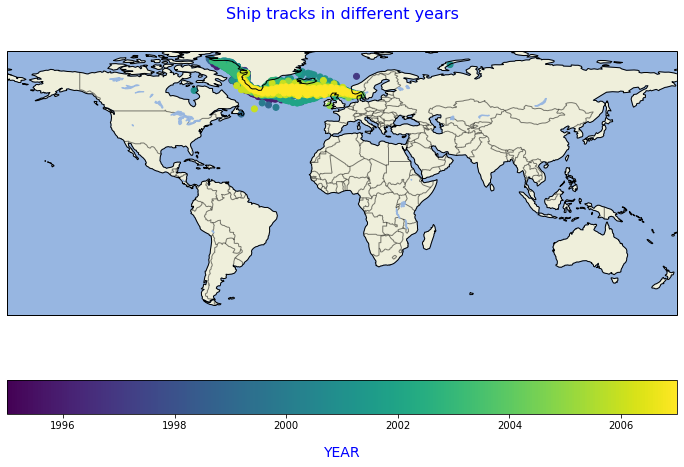

In [13]:

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.scatter(SH_data.LON, SH_data.LAT, c=SH_data.YR, transform=ccrs.Geodetic())
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c= 'blue', fontsize = 14)
plt.title ('Ship tracks in different years', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('YEAR', labelpad=15, x=0.5, rotation=0, c = 'blue', fontsize = 14)


ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.set_extent([-150, 60, -25, 60])

plt.show()


A plot of the ship tracks from Europe to Greenland over the years showing the longitude, latitude, and colored by year. 

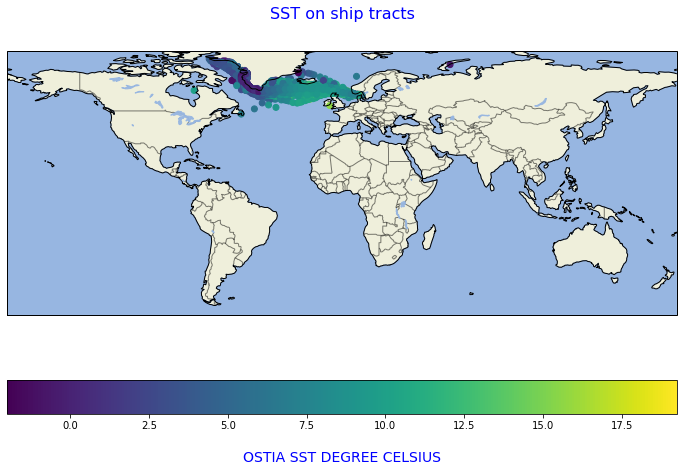

In [14]:

plt.figure(figsize = (12,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.scatter(SH_data.LON, SH_data.LAT, c=SH_data.OSST, transform=ccrs.Geodetic())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.set_extent([-150, 60, -25, 60])
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c= 'blue', fontsize = 14)
plt.title ('SST on ship tracts', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('OSTIA SST DEGREE CELSIUS', labelpad=20, x=0.50, rotation=0, c = 'blue', fontsize = 14)
plt.show()


A plot of the SST on ship tracks from Europe to Greenland showing the longitude, latitude, and colored by OSST temperature. 

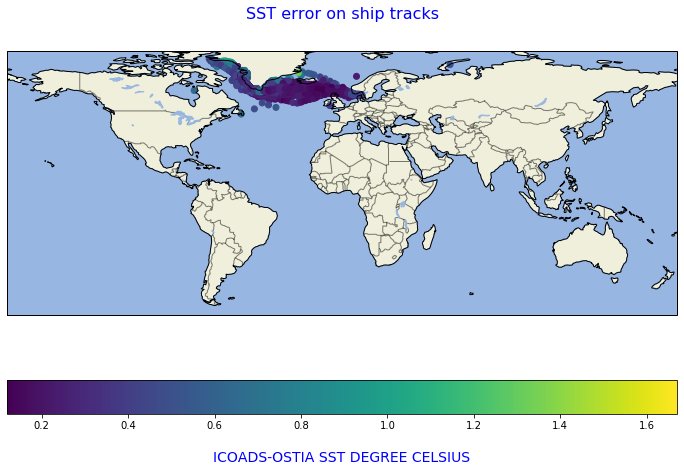

In [15]:
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.scatter(SH_data.LON, SH_data.LAT, c=SH_data.OERR, transform=ccrs.Geodetic())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.set_extent([-150, 60, -25, 60])
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c= 'blue', fontsize = 14)
plt.title ('SST error on ship tracks', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOADS-OSTIA SST DEGREE CELSIUS', labelpad=20, x=0.50, rotation=0, c = 'blue', fontsize = 14)
plt.show()

A plot of the SST error on ship tracks from Europe to Greenland  showing the longitude, latitude, and colored by OERR . 

# Data Analysis on the Drifting buoy (DB)

In [16]:
DB_data = DB_data[(DB_data.ICflag == 1)] #filter out only ICflag = 1 for data analysis


In [17]:
DB_data.ICflag.value_counts() #ensuring the ICflag == 0 are not included

1    20361
Name: ICflag, dtype: int64

In [18]:
DB_data.info() #showing data types of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20361 entries, 0 to 20416
Data columns (total 21 columns):
YR        20361 non-null int64
MO        20361 non-null int64
DY        20361 non-null int64
HR        20361 non-null float64
LAT       20361 non-null float64
LON       20361 non-null float64
ISST      20361 non-null float64
OSST      20361 non-null float64
OERR      20361 non-null float64
SI        0 non-null float64
ICflag    20361 non-null int64
DS        0 non-null float64
VS        0 non-null float64
WDIR      0 non-null float64
WSPD      0 non-null float64
SLP       11118 non-null float64
AT        0 non-null float64
WBT       0 non-null float64
DPT       0 non-null float64
CLT       0 non-null float64
CLL       0 non-null float64
dtypes: float64(17), int64(4)
memory usage: 3.4 MB


In [19]:
DB_data.describe() #showing the summary statistics for the data

,YR,MO,DY,HR,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
count,20361.000000,20361.000000,20361.000000,20361.000000,20361.000000,20361.000000,20361.000000,20361.000000,20361.000000,0.0,...,0.0,0.0,0.0,0.0,11118.000000,0.0,0.0,0.0,0.0,0.0
mean,2004.810864,6.320024,15.665979,12.013859,-11.579784,57.737135,26.724370,26.791582,0.203315,NaN,...,NaN,NaN,NaN,NaN,1014.269104,NaN,NaN,NaN,NaN,NaN
std,3.355380,3.464986,8.859444,7.024733,10.494810,11.847826,2.337836,2.296096,0.095717,NaN,...,NaN,NaN,NaN,NaN,4.565939,NaN,NaN,NaN,NaN,NaN
min,1996.000000,1.000000,1.000000,0.000000,-40.820000,17.060000,18.000000,13.780000,0.120000,NaN,...,NaN,NaN,NaN,NaN,994.800000,NaN,NaN,NaN,NaN,NaN
25%,2001.000000,3.000000,8.000000,5.830000,-18.560000,53.000000,25.400000,25.410000,0.160000,NaN,...,NaN,NaN,NaN,NaN,1010.700000,NaN,NaN,NaN,NaN,NaN
50%,2005.000000,6.000000,16.000000,12.080000,-12.930000,56.310000,27.000000,27.030000,0.190000,NaN,...,NaN,NaN,NaN,NaN,1013.500000,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,10.000000,23.000000,17.830000,-3.730000,63.140000,28.400000,28.500000,0.210000,NaN,...,NaN,NaN,NaN,NaN,1017.400000,NaN,NaN,NaN,NaN,NaN
max,2010.000000,12.000000,31.000000,23.980000,10.740000,84.830000,32.500000,31.060000,1.070000,NaN,...,NaN,NaN,NaN,NaN,1040.600000,NaN,NaN,NaN,NaN,NaN


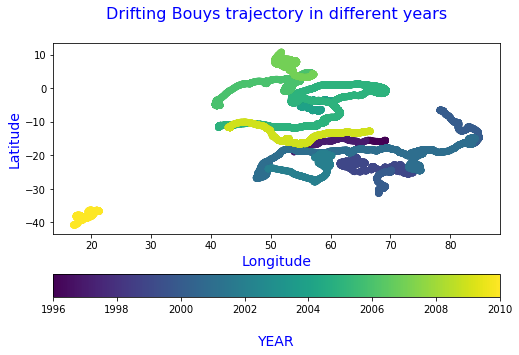

In [20]:
# Reproduce the visualizations that were given on the Sea Surface temperature Data


plt.figure(figsize=(8,5))
plt.scatter(DB_data.LON, DB_data.LAT,  c = DB_data.YR)
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c= 'blue', fontsize = 14)
plt.title ('Drifting Bouys trajectory in different years', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('YEAR', labelpad=20, y=0.5, c = 'blue', fontsize = 14)
plt.show()






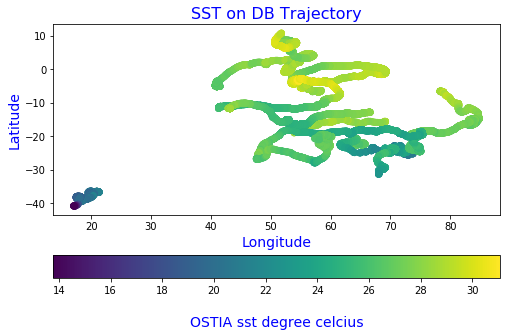

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(DB_data.LON, DB_data.LAT,  c = DB_data.OSST)
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c = 'blue', fontsize = 14)
plt.title ('SST on DB Trajectory', c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('OSTIA sst degree celcius', labelpad=20, y=0.5, c = 'blue', fontsize = 14)
plt.show()

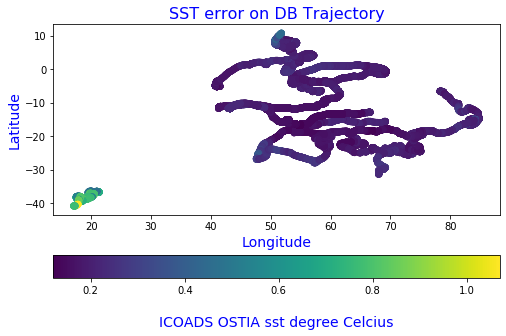

In [22]:
plt.figure(figsize = (8,5))

plt.scatter(DB_data.LON, DB_data.LAT,  c = DB_data.OERR)
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c = 'blue', fontsize = 14)
plt.title ('SST error on DB Trajectory', c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOADS OSTIA sst degree Celcius', labelpad=20, y=0.5, c = 'blue', fontsize = 14)
plt.show()


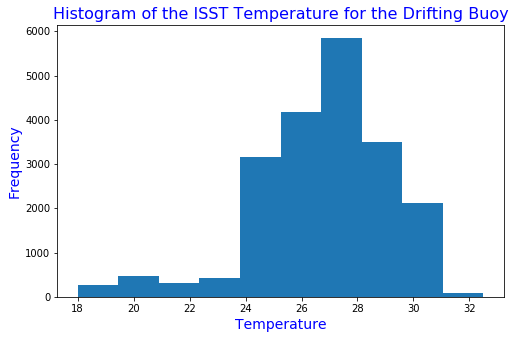

In [23]:

plt.figure(figsize = (8,5))
plt.hist(DB_data.ISST)
plt.xlabel('Temperature', c = 'blue', fontsize = 14)
plt.ylabel('Frequency', c = 'blue', fontsize = 14)
plt.title('Histogram of the ISST Temperature for the Drifting Buoy', c = 'blue', fontsize = 16)
plt.show()



Histogram for the ISST is slightly skewed left, but the distribution looks like a normal distribution

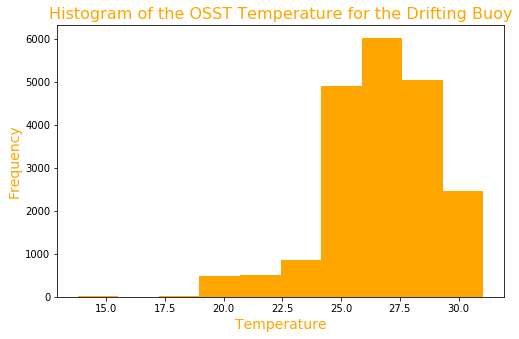

In [24]:
plt.figure(figsize = (8,5))

plt.hist(DB_data.OSST, color = 'orange')
plt.xlabel('Temperature', c = 'orange', fontsize = 14)
plt.ylabel('Frequency', c = 'orange', fontsize = 14)
plt.title('Histogram of the OSST Temperature for the Drifting Buoy', c = 'orange', fontsize = 16)
plt.show()


Histogram for the OSST is slightly more skewed compared to that of the ISST, but the distribution still looks like a normal distribution.

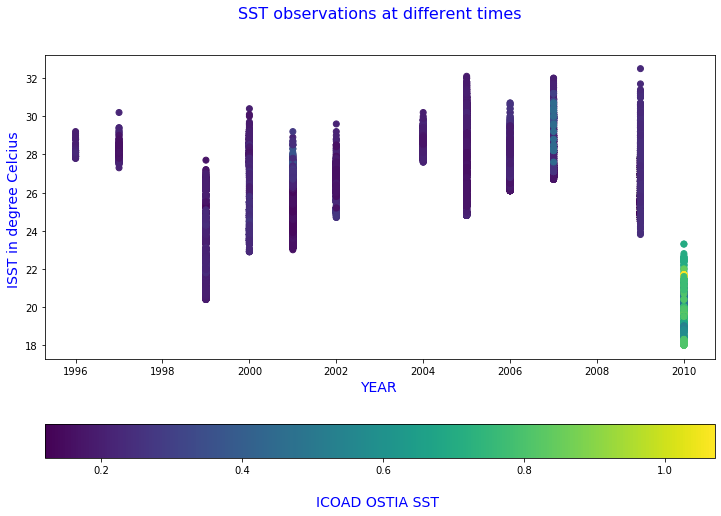

In [25]:

plt.figure(figsize = (12,8))
plt.scatter(DB_data.YR, DB_data.ISST, c = DB_data.OERR)
plt.xlabel ('YEAR', c = 'blue', fontsize = 14)
plt.ylabel ('ISST in degree Celcius ', c= 'blue', fontsize = 14)
plt.title ('SST observations at different times', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOAD OSTIA SST ', labelpad=20, x=0.50, rotation=0, c = 'blue', fontsize = 14)
plt.show()



The visualization shows that there was no readings 1998, 2003, 2008. In 2010, beetween 18 degrees to 24 degree celcius we had the highest errors.

Mean =  -0.06721182653111321
STD =  0.4738005648115254


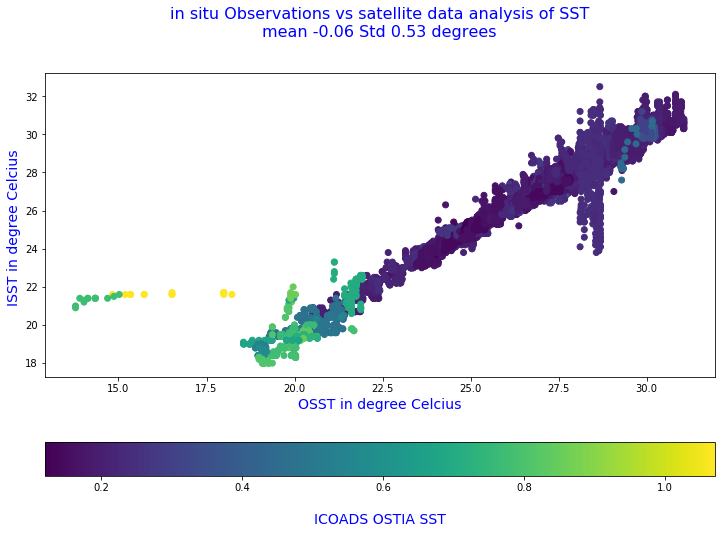

In [26]:
Difference = DB_data['ISST'] - DB_data['OSST']
Mean = Difference.mean()
STD = Difference.std()
print("Mean = ", Mean)
print("STD = ", STD)


plt.figure(figsize = (12,8))

plt.scatter(DB_data.OSST, DB_data.ISST, c = DB_data.OERR)
plt.xlabel ('OSST in degree Celcius', c = 'blue', fontsize = 14)
plt.ylabel ('ISST in degree Celcius ', c= 'blue', fontsize = 14)
plt.title ('in situ Observations vs satellite data analysis of SST' '\n' 'mean -0.06 Std 0.53 degrees', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOADS OSTIA SST', labelpad=20, x=0.50, rotation=0, c = 'blue', fontsize = 14)
plt.show()


The scatterplot shows a somewhat linear relationship between the OSST and ISST Temperature measurement over the years. The outliers shows the highest errors (0.9 - 1.0) with the OSST temperature between approximately 12 and 18 degree celcius, while the error for the ISST temperature occued around 21 degrees. I called temperatures in that region outliers, because it has been detached from the almost linear relationship between the two temperatures. There is a fluctuation in ISST temperature when the error is around 0.2, ranging from 24 degree celcius to 32 degree celcius.

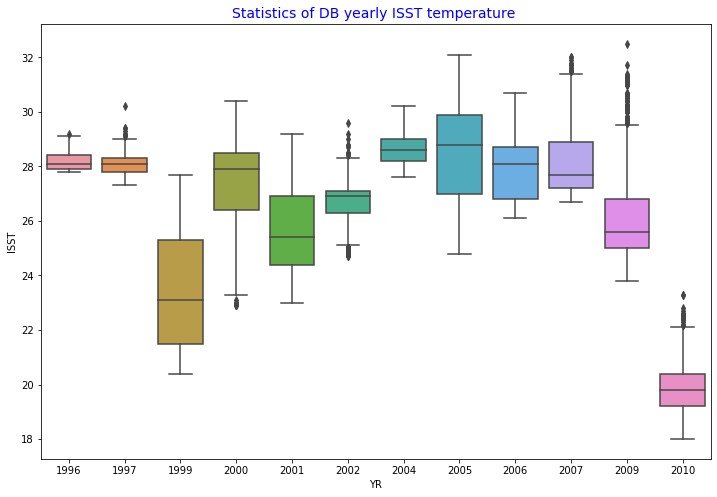

Text(0.5, 1.0, 'Statistics of DB yearly OSST temperature ')

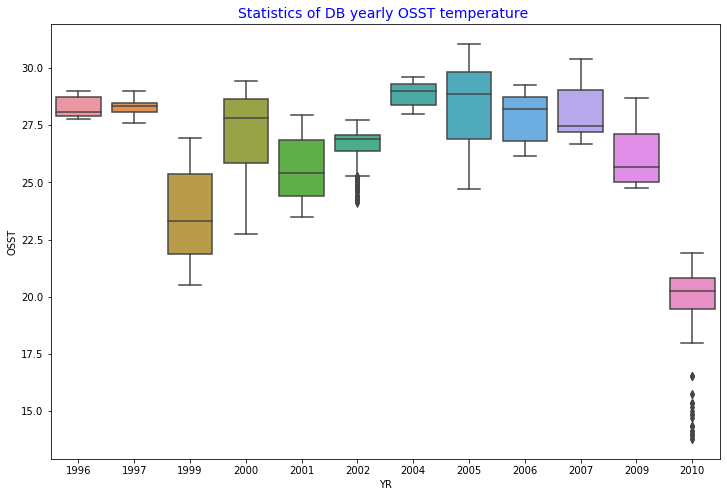

In [27]:

plt.figure(figsize = (12,8))
#plt.subplots(1,1)
sns.boxplot(x = 'YR', y = 'ISST', data = DB_data)
plt.title('Statistics of DB yearly ISST temperature ', c = 'blue', fontsize = 14)
plt.show()


plt.figure(figsize = (12,8))
#plt.subplots(1,1)
sns.boxplot(x = 'YR', y = 'OSST', data = DB_data)
plt.title('Statistics of DB yearly OSST temperature ', c= 'blue', fontsize = 14)


The data above shows the boxplots comparing  ISST temperatures between years 1996 to 2010.The temperature means for year 2010 was the lowest, around 19.5 degrees. There are some outliers in the year 2010 that shows temperature rising to about 23 degrees CelSius, while in 2009, the outliers ranged from 29 to 35 degree CelSius.

The data above shows the boxplots comparing  OSST temperatures between years 1996 to 2010.The temperature means for year 2010 was the lowest, around 20 degrees. There are some outliers in the year 2010 that shows temperature falling below 17 degrees CelSius.



In [28]:
#95% confidence interval for the average temmperture of ISST measurement
from scipy import stats
import numpy as np
import math
mean, sigma = np.mean(DB_data.ISST), np.std(DB_data.ISST)

conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)

stats.norm.interval(0.95, loc=mean, scale=sigma/math.sqrt(len(DB_data.ISST)))


(26.692259261991556, 26.756480976700804)


The 95% confidence interval for the average ISST temperature measurement is between 26.70 degrees celcius and 26.76 degree celcius

In [29]:
#95% confidence interval for the average temmperture of OSST measurement

mean, sigma = np.mean(DB_data.OSST), np.std(DB_data.OSST)

conf_int = stats.norm.interval(0.95, loc=mean, 
    scale=sigma)

stats.norm.interval(0.95, loc=mean, scale=sigma/math.sqrt(len(DB_data.OSST)))


(26.760044394377733, 26.823119497375746)

The 95% confidence interval for the OSST average temperature is between 26.76 degrees celcius and 26.83 degree celcius

The results comparing the 95% confidence intervals between the ISST temperature measurement and the OSST temperature measurement shows that the average temperature reading from the ISST is slightly lower than the reading from the OSST as shown in the visualizations below.

In [30]:
Mean_ISST = DB_data['ISST'].mean()
STD_ISST = DB_data['ISST'].std()
Mean_OSST = DB_data['OSST'].mean()
STD_OSST = DB_data['ISST'].std()


print('The mean and the standard deviation for ISST measurement is =', Mean_ISST, STD_ISST)
print('The mean and the standard deviation for OSST measurement is =', Mean_OSST, STD_OSST)


The mean and the standard deviation for ISST measurement is = 26.72437011934618 2.3378359213230224
The mean and the standard deviation for OSST measurement is = 26.79158194587674 2.3378359213230224


These findings show that either measurements, in situ or the Satelite readings are reliable when reading 
the sea surface temperature. Their means are very close, and standard deviations are identical.
One interesting observation is that on finding the means of the ISST and OSST temperature data, i noted that both values respectively lay somewhere in the middle of their respective 95% confidence interval

<Figure size 1728x576 with 0 Axes>

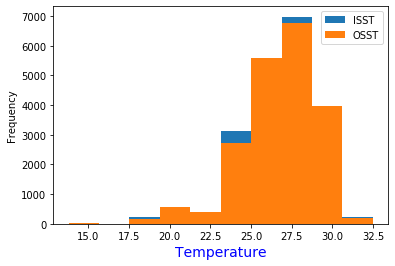

In [32]:
plt.figure(figsize = (24,8))
DB_data.plot (y = ['ISST','OSST'], kind = 'hist')
plt.xlabel('Temperature', fontsize = 14, c = 'blue')
plt.show()

Histogram showing distribution of both temperature ISST and OSST. The ISST temperature has the greatest frequency, or the highest mode.

In [33]:
#Pearson correlation test
#Hypothesis testing for independence of the Drifting Buoy.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#H0 : The two samples/obsevations are independent
#H1 : There is a dependency between the two samples/observations

from scipy.stats import pearsonr
ISST_1 = DB_data.ISST
OSST_1 = DB_data.OSST
stat, p = pearsonr(ISST_1, OSST_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Most likely independent')
else:
	print('Most likely dependent')

stat=0.979, p=0.000
Most likely dependent


#Pearson correlation test
#Hypothesis testing for independence of the Drifting Buoy.

#Assumptions
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#H0 : The two samples/obsevations are independent
#H1 : There is a dependency between the two samples/observations

stat=0.975, p=0.000
Most likely dependent

Because the p value is small, less than 0.05 significance level, we would have to reject the null hypothesis. There is not significant evidence to show that the two observations are independent.

In [34]:
# Hypothesis Test to show whether the means of temperature measurement ISST and OSST are significantly different.

#Assumptions

#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the means of the samples are equal.
#H1: the means of the samples are different.

from scipy.stats import ttest_ind
ISST_1 = DB_data.ISST
OSST_1 = DB_data.OSST

stat, p = ttest_ind(ISST_1, OSST_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The means of the observations not equal')
else:
	print('The means of the observations are not equal')

stat=-2.927, p=0.003
The means of the observations are not equal


Hypothesis Test to show whether the means of 
temperature measurement ISST and OSST are significantly different.

#Assumptions

#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

#Interpretation
#H0: the means of the samples are equal.
#H1: the means of the samples are different.

stat=-2.697, p=0.003
The means of the observations are not equal

Because the P value is smaller than the level of significance (0.05), we reject the null hypothesis.
There is no significant evidence to show that the means of the two observations are equal.

# MOORING BUOY 

In [35]:
MB_data = MB_data[(MB_data.ICflag == 1)] #filter out only ICflag = 1 for data analysis

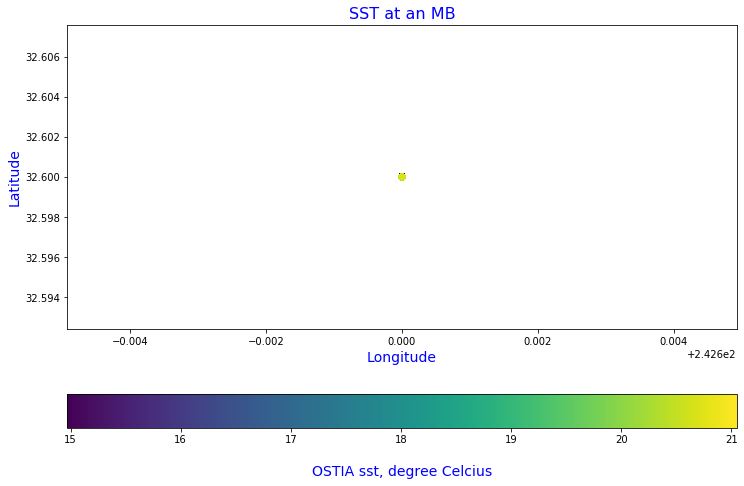

In [36]:

plt.figure(figsize=(12,8))
plt.scatter(MB_data.LON, MB_data.LAT,c = MB_data.OSST)
plt.xlabel ('Longitude', c = 'blue', fontsize = 14)
plt.ylabel ('Latitude', c = 'blue', fontsize = 14)
plt.title ('SST at an MB', c ='blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('OSTIA sst, degree Celcius', labelpad=20, y=0.5, c = 'blue', fontsize = 14)
plt.show()



The Mooring Bouy remained at the same latitude and longitude.

Mean =  0.27397169113763514
STD =  0.5188841927178806


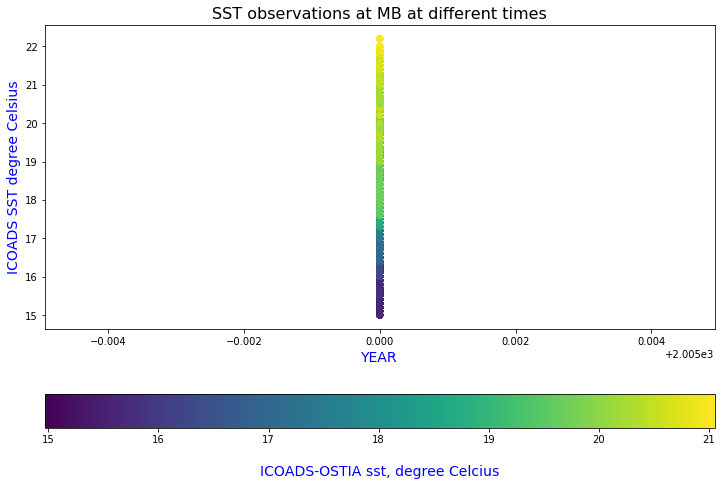

In [37]:
#double check
Difference = MB_data['ISST'] - MB_data['OSST']
Mean = Difference.mean()
STD = Difference.std()
print("Mean = ", Mean)
print("STD = ", STD)

plt.figure(figsize=(12,8))
plt.scatter(MB_data.YR, MB_data.ISST,c = MB_data.OSST)
plt.xlabel ('YEAR', c = 'blue', fontsize = 14)
plt.ylabel ('ICOADS SST degree Celsius', c = 'blue', fontsize = 14)
plt.title ('SST observations at MB at different times', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOADS-OSTIA sst, degree Celcius', labelpad=20, y=0.5, c = 'blue', fontsize = 14)
plt.show()



There is indication that the Mooring Buoy stayed in one place, while the ISST temperature got as high as 22 degree celcius

Mean =  0.27397169113763514
STD =  0.5188841927178806


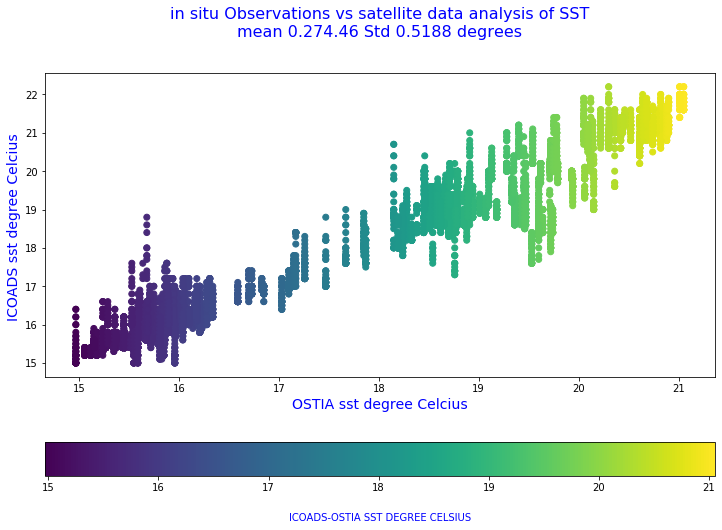

In [38]:
Difference = MB_data['ISST'] - MB_data['OSST']
Mean = Difference.mean()
STD = Difference.std()
print("Mean = ", Mean)
print("STD = ", STD)

plt.figure(figsize =(12,8))
plt.scatter(MB_data.OSST, MB_data.ISST, c = MB_data.OSST)
plt.xlabel ('OSTIA sst degree Celcius', c = 'blue', fontsize = 14)
plt.ylabel ('ICOADS sst degree Celcius ', c= 'blue', fontsize = 14)
plt.title ('in situ Observations vs satellite data analysis of SST' '\n' 'mean 0.274.46 Std 0.5188 degrees', y = 1.10, c = 'blue', fontsize = 16)
clb = plt.colorbar(orientation = 'horizontal')
clb.set_label('ICOADS-OSTIA SST DEGREE CELSIUS', labelpad=20, x=0.50, rotation=0, c = 'blue')
plt.show()

The results shows a linear relationship between the two temperatures as the temperature values gradually increased or got warmer.